In [1]:
from tqdm import tqdm, trange
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

import batch_prompt
from utils import get_token_prob

In [2]:
p_judge = '''Q: Is the following sequence of coin flips generated by a random process with no pattern, or are they generated by a non-random algorithm? [{flips}]

A: The sequence was generated by a'''

In [3]:
n_flips = 100

rand_x = np.random.rand(100) > .5
rand_x = [['Heads', 'Tails'][xi] for xi in rand_x]
print(rand_x)

['Heads', 'Heads', 'Tails', 'Heads', 'Tails', 'Heads', 'Tails', 'Heads', 'Tails', 'Tails', 'Heads', 'Tails', 'Tails', 'Heads', 'Tails', 'Tails', 'Tails', 'Heads', 'Tails', 'Heads', 'Heads', 'Heads', 'Tails', 'Heads', 'Tails', 'Heads', 'Tails', 'Heads', 'Tails', 'Heads', 'Heads', 'Heads', 'Tails', 'Heads', 'Tails', 'Heads', 'Tails', 'Tails', 'Tails', 'Heads', 'Tails', 'Heads', 'Heads', 'Heads', 'Tails', 'Tails', 'Tails', 'Heads', 'Tails', 'Heads', 'Heads', 'Tails', 'Tails', 'Heads', 'Heads', 'Tails', 'Tails', 'Tails', 'Tails', 'Heads', 'Heads', 'Heads', 'Heads', 'Heads', 'Tails', 'Heads', 'Tails', 'Tails', 'Tails', 'Tails', 'Tails', 'Heads', 'Tails', 'Heads', 'Tails', 'Heads', 'Tails', 'Tails', 'Heads', 'Heads', 'Heads', 'Tails', 'Tails', 'Heads', 'Tails', 'Tails', 'Heads', 'Tails', 'Heads', 'Heads', 'Tails', 'Tails', 'Heads', 'Heads', 'Heads', 'Tails', 'Heads', 'Heads', 'Tails', 'Tails']


/var/folders/41/_ql36yd95wq0zy1_ml3g0g2w0000gn/T/ipykernel_16695/2512303724.py:4: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
  rand_x = [['Heads', 'Tails'][xi] for xi in rand_x]


In [4]:
n_flips = 100
concept = [0, 1, 1]

flip_strs = ['Heads', 'Tails']
flips = [flip_strs[i] for i in concept * n_flips]

print(flips[:10])

['Heads', 'Tails', 'Tails', 'Heads', 'Tails', 'Tails', 'Heads', 'Tails', 'Tails', 'Heads']


In [5]:
res_jud = batch_prompt.completions(
    p_judge, [{'flips': ', '.join(flips[:n]) + ','} for n in range(1, n_flips+1)], 
    {'max_tokens': 1, 'logprobs': 3, 'engine': 'gpt-3.5-turbo-instruct'}, 
    verbose=2, use_async=False)   # note: async doesn't work inside jupyter

Calling OpenAI API . . .


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [00:05<00:00,  3.37it/s]

~~~~~~~~~~~~~~~ Done ~~~~~~~~~~~~~~~
Time: 5.95s
Number of results: 100
{'completion_tokens': 100, 'prompt_tokens': 17333, 'total_tokens': 17433}


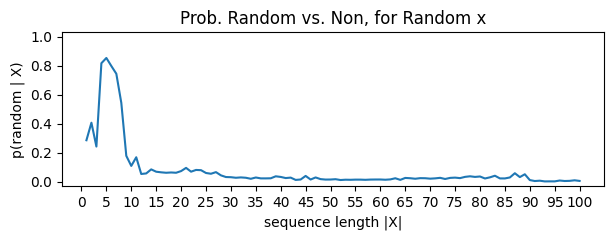

In [8]:
plt.rcParams['figure.figsize'] = (7, 2)

rows = []

x = list(range(1, n_flips+1))
y = [get_token_prob(r, ['n', 'r']) for r in res_jud]
rows += [{'len_x': x_, 'p_random': y_} for x_, y_ in zip(x, y)]
    
# sns.lineplot(data=pd.DataFrame(rows), x="len_x", y="p_random", ci=95)
sns.lineplot(data=pd.DataFrame(rows), x="len_x", y="p_random")   #, ci=95, estimator=np.median)
plt.xticks(list(range(0, n_flips+1, n_flips//20)))
plt.ylabel('p(random | X)')
plt.xlabel('sequence length |X|')
plt.ylim(-.03, 1.03)
plt.yticks([0, .2, .4, .6, .8, 1.])
plt.title('Prob. Random vs. Non, for Random x')

# plt.savefig('imgs/fig_judge-rand.pdf')
plt.show()